# Final project Data Journalism
---

## Nuggets have best first quarter of their season in the Jokic era
* ### Setting the context of N/82 games
* ### Their record
* ###  The bench contribution
* ###  Jokic performance
> * #### Assits throughout N games
> * #### Minutes on average per N games
* ### Jamal performance (not a slow start this year)
> * #### Points per minutes

In [308]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nba_utils.call_API import get_games_data
from nba_utils.call_API import tidy_axes
from nba_utils.call_API import get_boxscores

In [341]:
# Adjust pandas output to show more rows and columns
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

# Autorelode modules when changes are saved
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [412]:
# Constant variables to be used throughout analysis
NUGGETS_ID = 1610612743

# For visualization
GOLDEN_RATIO = 1.618
HEIGHT = 12
WIDTH = HEIGHT*GOLDEN_RATIO

MIDNIGHT_BLUE = "#0e2240"
SUNSHINE_YELLOW = "#fec524"
FLATIRONS_RED = "#8b2131"
SKYLINE_BLUE = "#1d428a"

# Total games played this seasoin
N_GAMES = 23 # 28% of the way through the season

In [172]:
# Season strings for calling API
season_strs = [f"20{val:d}-{val+1:d}" for val in range(15, 26)]
season_strs

# Add constant for Jokic era
YEARS_JOK = len(season_strs)

In [98]:
# Season strings for calling API (all time)
season_strs_all = [f"{val:d}-{str(val+1)[-2:]:s}" for val in range(1976, 2026)]
season_strs_all

['1976-77',
 '1977-78',
 '1978-79',
 '1979-80',
 '1980-81',
 '1981-82',
 '1982-83',
 '1983-84',
 '1984-85',
 '1985-86',
 '1986-87',
 '1987-88',
 '1988-89',
 '1989-90',
 '1990-91',
 '1991-92',
 '1992-93',
 '1993-94',
 '1994-95',
 '1995-96',
 '1996-97',
 '1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21',
 '2021-22',
 '2022-23',
 '2023-24',
 '2024-25',
 '2025-26']

In [114]:
# Get game data per season (takes a couple minutes to run)
game_datas = {szn:get_games_data(szn, NUGGETS_ID).iloc[:N_GAMES] for szn in season_strs_all}

# Start where data is recorded (1983 and beyond)
game_datas_full = {szn:game_datas[szn] for szn in game_datas.keys() if int(szn[:4])>1982}

game_datas_full.keys()

dict_keys(['1983-84', '1984-85', '1985-86', '1986-87', '1987-88', '1988-89', '1989-90', '1990-91', '1991-92', '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25', '2025-26'])

In [115]:
# Get number of wins throughout N_GAMES in Jokic Era
wins = []
for szn in game_datas_full.keys():
    
    wins_losses = game_datas[szn]["WL"]
    num_wins = np.sum(wins_losses == "W")
    wins.append(num_wins)

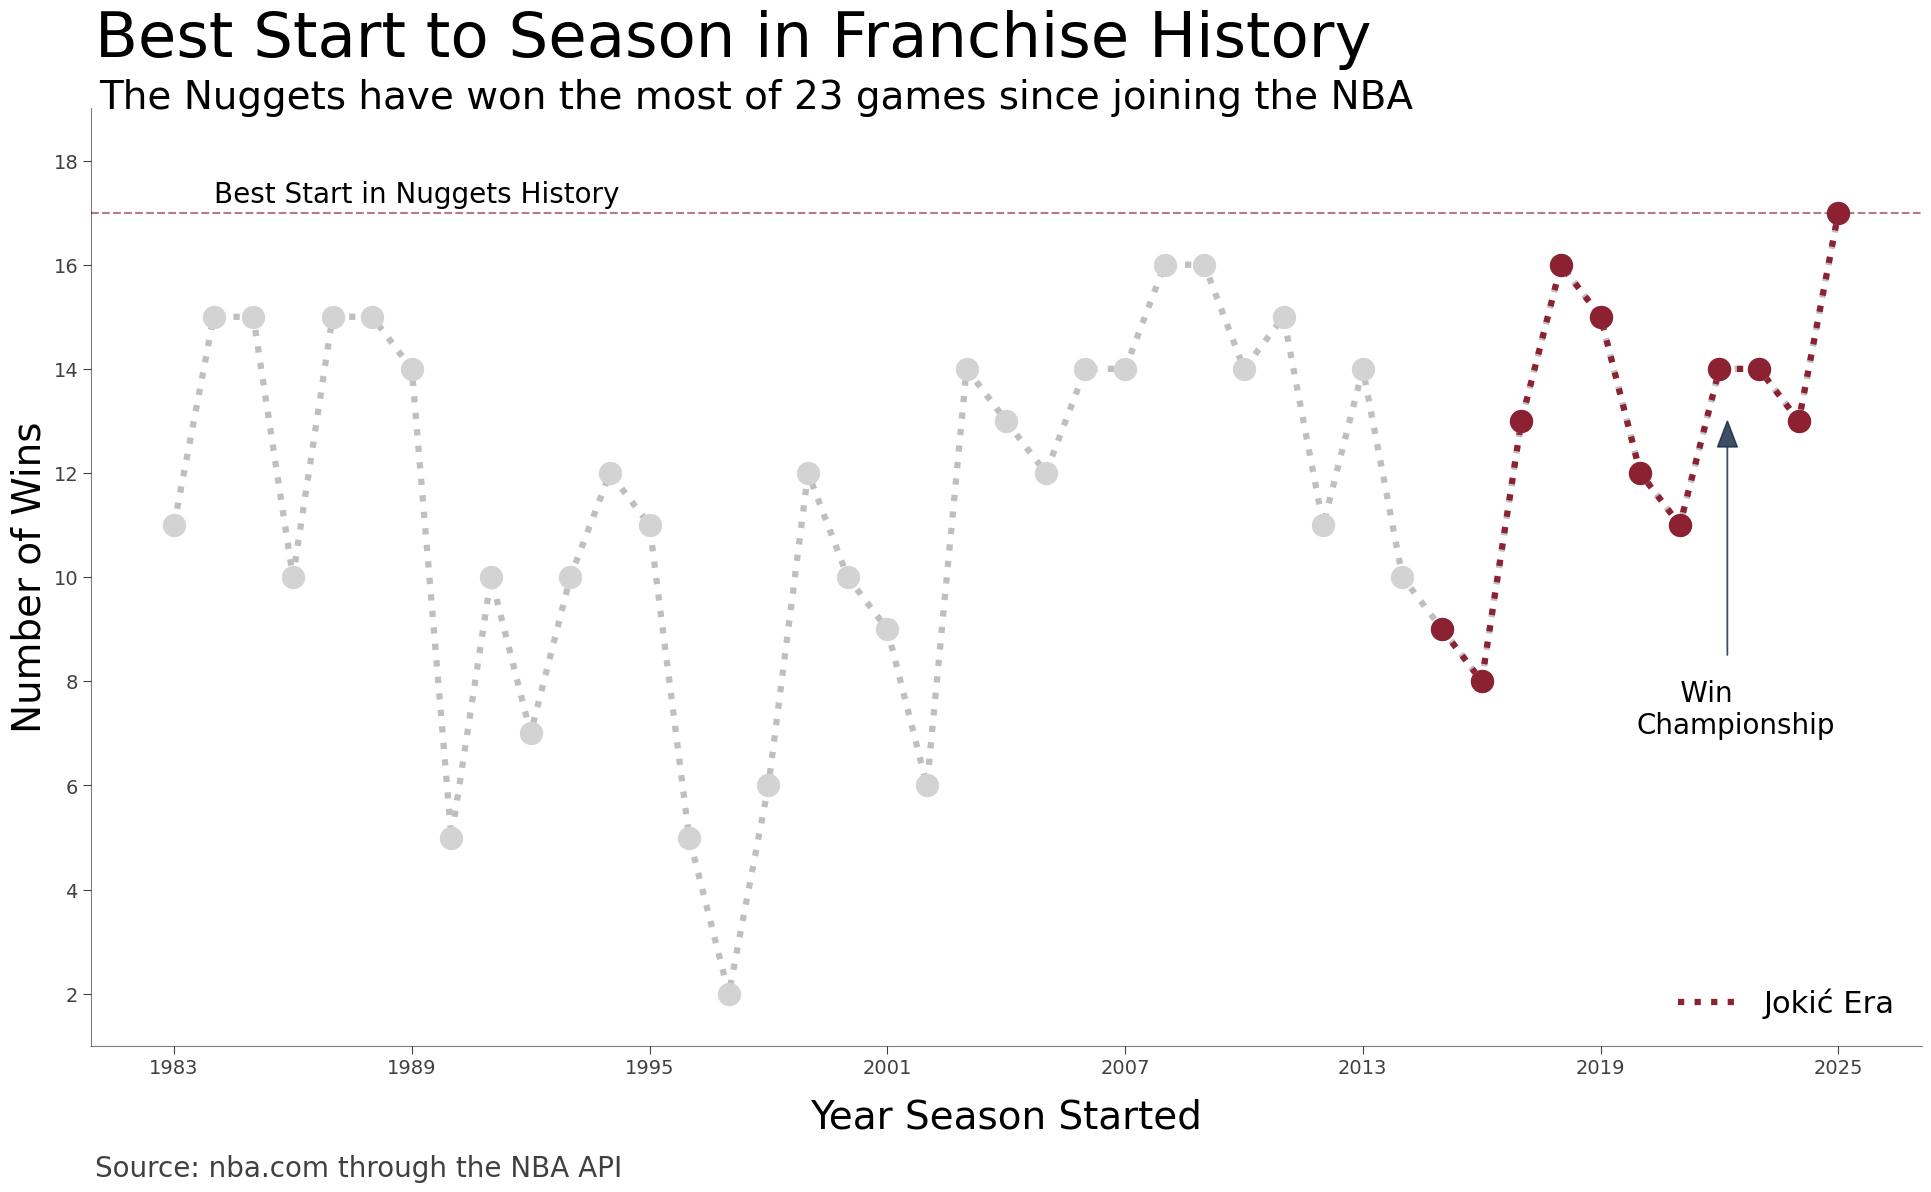

In [292]:
fig, ax = plt.subplots(figsize=(WIDTH, HEIGHT))

# Plot all time
ax.plot(wins, color="grey", linestyle="dotted", linewidth=4.5, alpha=0.5)
xrange = np.arange(0, len(wins))
ax.scatter(x=xrange, y=wins, color="lightgrey", s=250, zorder=3) # facecolors="none"

# Plot Jokic Era
xrange = np.arange(np.min(xrange[-YEARS_JOK:]), len(wins))
ax.plot(xrange, wins[-YEARS_JOK:], color=FLATIRONS_RED, linestyle="dotted", linewidth=4.5, alpha=1, label="Jokić Era")
ax.scatter(x=xrange, y=wins[-YEARS_JOK:], color=FLATIRONS_RED, s=250, edgecolors=FLATIRONS_RED, zorder=4)

# Plot horizontal line 
ax.axhline(np.max(wins), linestyle="dashed", color=FLATIRONS_RED, alpha=0.6)
ax.text(1, 17.2, "Best Start in Nuggets History", fontsize=20)

# Axis limits 
ax.set_ylim(1, 19)

# Axis label formatting
year_gap = 6
xtick_values = np.arange(0, len(wins), year_gap)
xtick_labels = [year.split("-")[0] for year in game_datas_full.keys()][::year_gap]
ax.set_xticks(xtick_values)
ax.set_xticklabels(xtick_labels, fontsize=18)
ax.set_xlabel("Year Season Started", fontsize=28, labelpad=15)
ax.set_ylabel("Number of Wins", fontsize=28)

# Annotations
plt.arrow(x=39.2, y=8.5, dx=0, dy=4,
          head_width=0.5, head_length=0.5, fc=MIDNIGHT_BLUE, ec=MIDNIGHT_BLUE, alpha=0.8)
ax.text(36.9, 7,  f"     Win\nChampionship", fontsize=20)

# Titles
ax.text(-2, 20, "Best Start to Season in Franchise History", fontsize=45)
ax.text(-1.9, 19, r"The Nuggets have won the most of 23 games since joining the NBA", fontsize=28)

# Footer
# ax.text(0, -0.025, r"$^\dagger$ Data repesents a four game moving average of 3 pointers made per minute.", fontsize=20, color=(0,0,0,.75))
ax.text(-2, -1.5, "Source: nba.com through the NBA API", fontsize=20, color=(0,0,0,.75))

tidy_axes(ax)
ax.legend(loc=4, frameon=False, fontsize=22)
plt.tight_layout()
plt.savefig("best_start.png")
plt.show()

---
## Bench player analysis

In [469]:
# Jokic era game data
jok_era_games = {szn:game_datas[szn] for szn in game_datas.keys() if int(szn[:4])>2019}

In [480]:
# Get plus minus of bench players in Jokic era
pms = []
points = []
minutes = []
for szn in jok_era_games.keys():
    print(szn)
    szn_game_IDs = jok_era_games[szn]["GAME_ID"]
    boxscore = get_boxscores(szn_game_IDs, None)
    
    # Get values for Jamal and Jokic
    jamal_data = boxscore[boxscore["firstName"]=="Jamal"]
    jamal_ppg = jamal_data["points"].sum() / len(jamal_data)
    points.append(jamal_ppg)
    
    jokic_data = boxscore[boxscore["firstName"]=="Nikola"]
    jokic_mpg = jokic_data["minutes"].apply(lambda x: float(x.split(":")[0])+float(x.split(":")[1])/60).sum() / len(jokic_data)
    minutes.append(jokic_mpg)
    
    
    # Remove starters
    bench_stats = boxscore[boxscore["position"]==""]
    
    # Get average bench plus minus per 36 minutes
    starter_minutes = 36 # conventional
    float_minutes = bench_stats["minutes"].apply(lambda x: float(x.split(":")[0])+float(x.split(":")[1])/60)
    total_bench_minutes = float_minutes.sum()
    total_bench_pm = bench_stats["plusMinusPoints"].sum()
    pm_per_36 = starter_minutes*total_bench_pm/total_bench_minutes 
    
    pms.append(pm_per_36)
    # break

2020-21
Processed gameID: 1
Processed gameID: 2
Processed gameID: 3
Processed gameID: 4
Processed gameID: 5
Processed gameID: 6
Processed gameID: 7
Processed gameID: 8
Processed gameID: 9
Processed gameID: 10
Processed gameID: 11
Processed gameID: 12
Processed gameID: 13
Processed gameID: 14
Processed gameID: 15
Processed gameID: 16
Processed gameID: 17
Processed gameID: 18
Processed gameID: 19
Processed gameID: 20
Processed gameID: 21
Processed gameID: 22
Processed gameID: 23
2021-22
Processed gameID: 1
Processed gameID: 2
Processed gameID: 3
Processed gameID: 4
Processed gameID: 5
Processed gameID: 6
Processed gameID: 7
Processed gameID: 8
Processed gameID: 9
Processed gameID: 10
Processed gameID: 11
Processed gameID: 12
Processed gameID: 13
Processed gameID: 14
Processed gameID: 15
Processed gameID: 16
Processed gameID: 17
Processed gameID: 18
Processed gameID: 19
Processed gameID: 20
Processed gameID: 21
Processed gameID: 22
Processed gameID: 23
2022-23
Processed gameID: 1


C:\Users\lons886\AppData\Local\Temp\ipykernel_22072\1746329127.py:12: RuntimeWarning: invalid value encountered in scalar divide
  jamal_ppg = jamal_data["points"].sum() / len(jamal_data)


Processed gameID: 2
Processed gameID: 3
Processed gameID: 4
Processed gameID: 5
Processed gameID: 6
Processed gameID: 7
Processed gameID: 8
Processed gameID: 9
Processed gameID: 10
Processed gameID: 11
Processed gameID: 12
Processed gameID: 13
Processed gameID: 14
Processed gameID: 15
Processed gameID: 16
Processed gameID: 17
Processed gameID: 18
Processed gameID: 19
Processed gameID: 20
Processed gameID: 21
Processed gameID: 22
Processed gameID: 23
2023-24
Processed gameID: 1
Processed gameID: 2
Processed gameID: 3
Processed gameID: 4
Processed gameID: 5
Processed gameID: 6
Processed gameID: 7
Processed gameID: 8
Processed gameID: 9
Processed gameID: 10
Processed gameID: 11
Processed gameID: 12
Processed gameID: 13
Processed gameID: 14
Processed gameID: 15
Processed gameID: 16
Processed gameID: 17
Processed gameID: 18
Processed gameID: 19
Processed gameID: 20
Processed gameID: 21
Processed gameID: 22
Processed gameID: 23
2024-25
Processed gameID: 1
Processed gameID: 2
Processed gameID

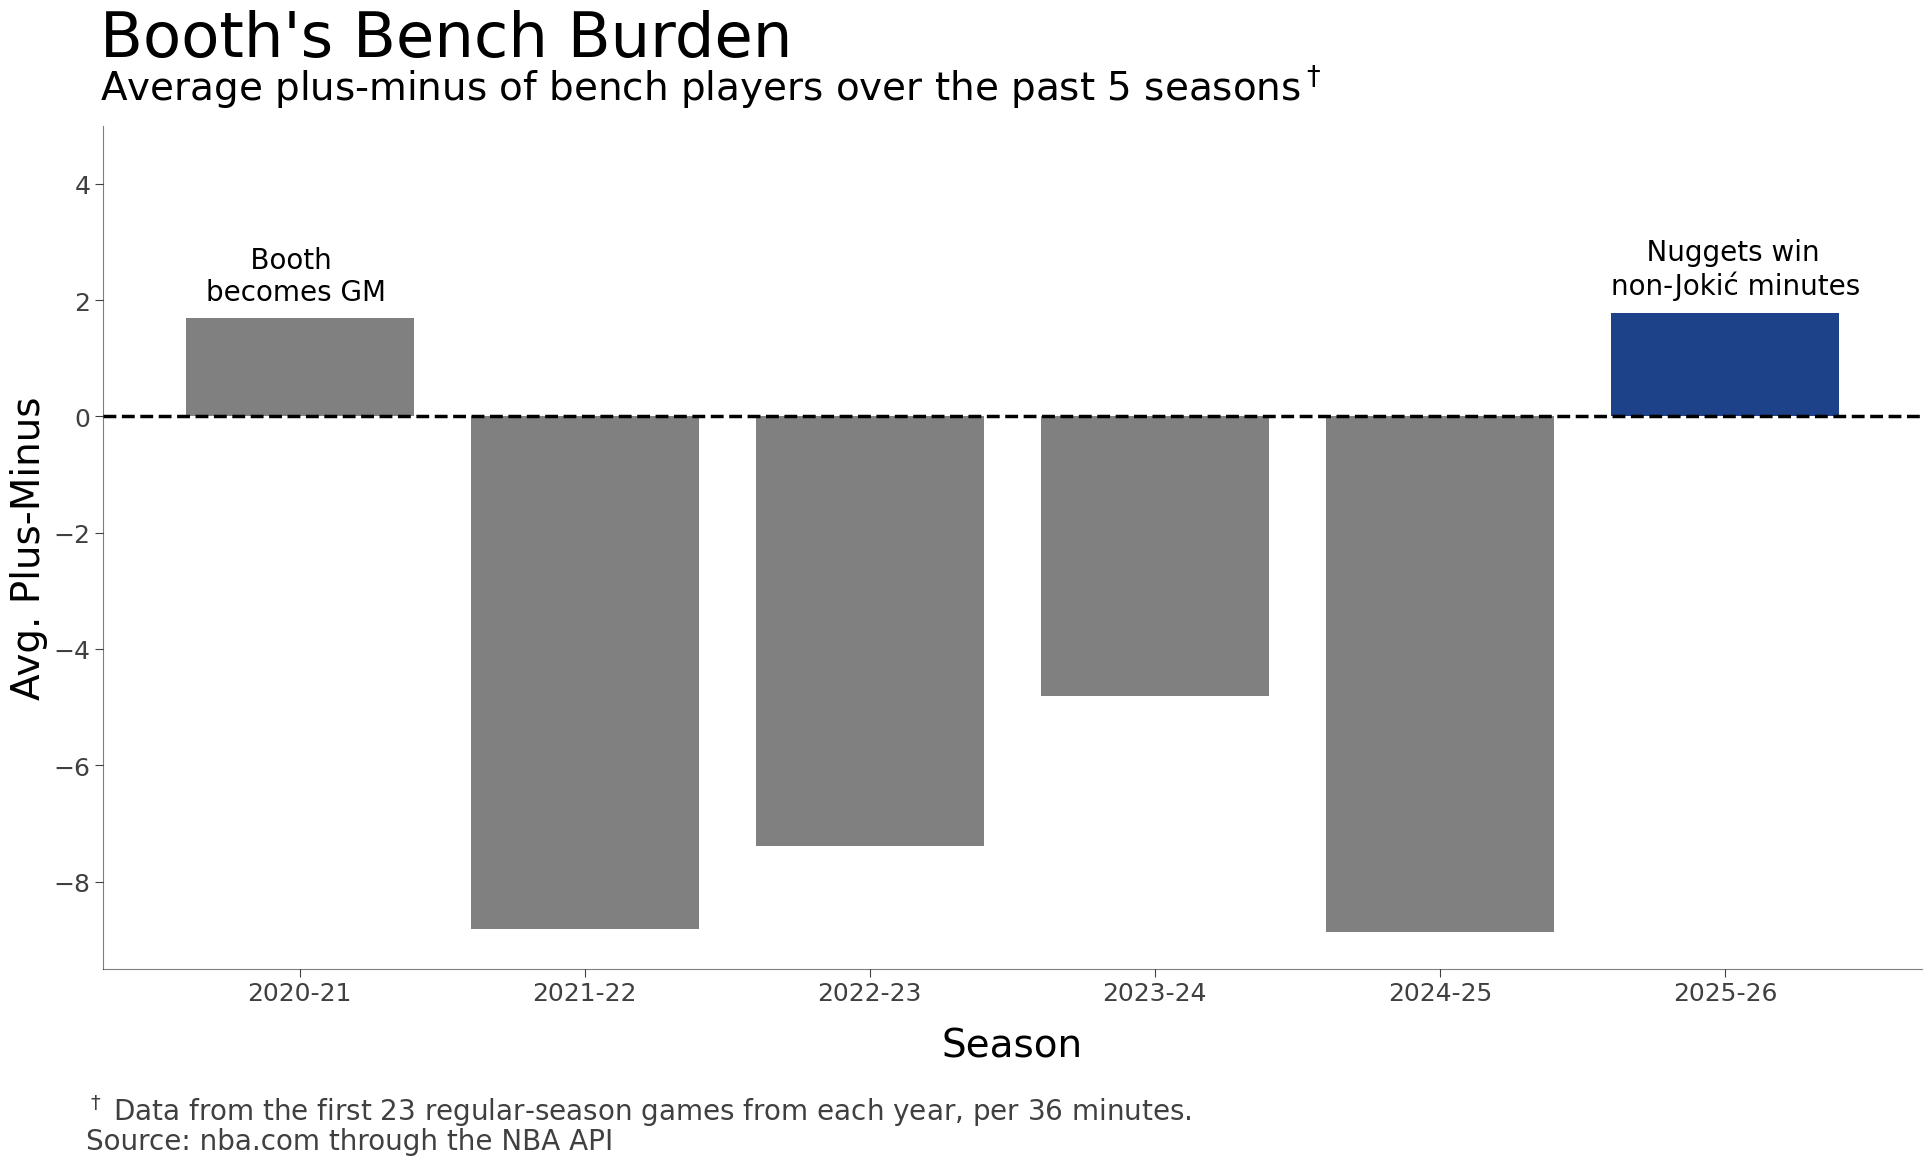

In [463]:
# Look at recent Booth era

# Redo this with real data when it API chills tf out
sim_data = [1.1, -2.4, -3.4, -2.7, -3.3, 1.2]
sim_data = pms

fig, ax = plt.subplots(figsize=(WIDTH, HEIGHT))

colors = ["grey" for d in sim_data]
colors[-1] = SKYLINE_BLUE
ax.bar(list(jok_era_games.keys()), sim_data, color=colors)

# Axis label formatting
xtick_values = np.arange(0, len(sim_data), 1)
xtick_labels = list(jok_era_games.keys())
ax.set_xticks(xtick_values)
ax.set_xticklabels(xtick_labels, fontsize=18)
ax.set_xlabel("Season", fontsize=28, labelpad=15)
ax.set_ylabel("Avg. Plus-Minus", fontsize=28)

# Annotations
ax.text(-0.33, 2,  f"     Booth\nbecomes GM", fontsize=20)
ax.text(4.6, 2.1,  f"    Nuggets win\nnon-Jokić minutes", fontsize=20)

# Titles
ax.text(-0.7, 6.2, "Booth's Bench Burden", fontsize=45)
ax.text(-0.7, 5.456, r"Average plus-minus of bench players over the past 5 seasons$^\dagger$", fontsize=28)

# Footer
ax.text(-0.75, -12.1, r"$^\dagger$ Data from the first 23 regular-season games from each year, per 36 minutes.", fontsize=20, color=(0,0,0,.75))
ax.text(-0.75, -12.6, "Source: nba.com through the NBA API", fontsize=20, color=(0,0,0,.75))

ax.set_ylim(-9.5, 5)
ax.axhline(0, linestyle="dashed", color="black", zorder=3, linewidth=2.5)


tidy_axes(ax)
plt.tight_layout()
# plt.savefig("plus_minus.png")
plt.show()

---

In [472]:
# Fill in missing piece from previous data 
jamal_boxscore = get_boxscores(jok_era_games["2022-23"]["GAME_ID"], "jamal-murray")

Processed gameID: 1
Processed gameID: 2
Processed gameID: 3
Processed gameID: 4
Processed gameID: 5
Processed gameID: 6
Processed gameID: 7
Processed gameID: 8
Processed gameID: 9
Processed gameID: 10
Processed gameID: 11
Processed gameID: 12
Processed gameID: 13
Processed gameID: 14
Processed gameID: 15
Processed gameID: 16
Processed gameID: 17
Processed gameID: 18
Processed gameID: 19
Processed gameID: 20
Processed gameID: 21
Processed gameID: 22
Processed gameID: 23


In [485]:
minutes[-2] - minutes[-1]

2.317246376811582

In [488]:
missing_data = jamal_boxscore["points"].sum()/N_GAMES
points[1] = missing_data
points

[18.571428571428573,
 14.826086956521738,
 17.94736842105263,
 17.4,
 17.88888888888889,
 25.045454545454547]

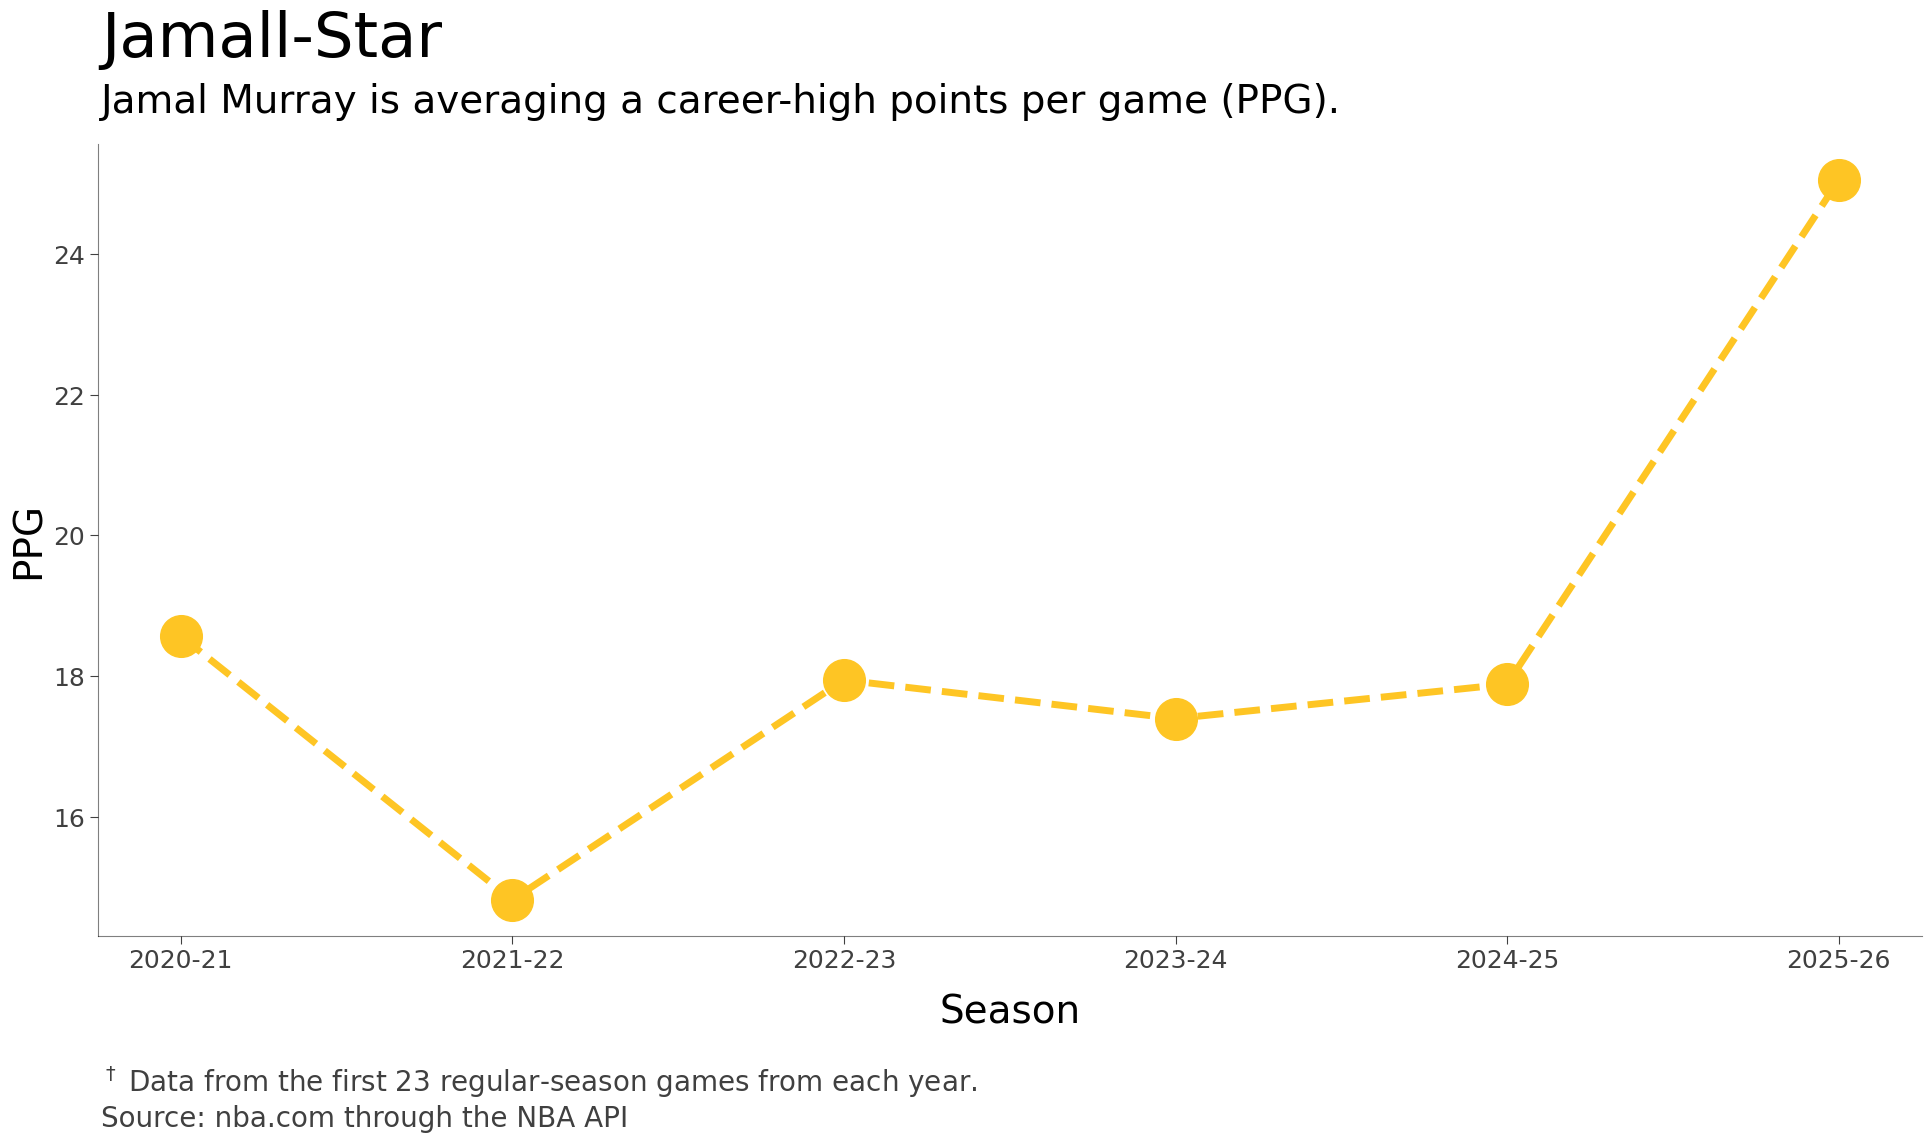

In [519]:
# Now look at Jamal PPG
fig, ax = plt.subplots(figsize=(WIDTH, HEIGHT))

ax.plot(list(jok_era_games.keys()), points, linewidth=5, color=SUNSHINE_YELLOW, marker="o", markersize=30, linestyle="dashed")

# Axis label formatting
xtick_values = np.arange(0, len(sim_data), 1)
xtick_labels = list(jok_era_games.keys())
ax.set_xticks(xtick_values)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel("Season", fontsize=28, labelpad=15)
ax.set_ylabel("PPG", fontsize=28)

# # Annotations

# # Titles
ax.text(-0.24, 26.8, "Jamall-Star", fontsize=45)
ax.text(-0.24, 26, r"Jamal Murray is averaging a career-high points per game (PPG).", fontsize=28)

# # Footer
ax.text(-0.24, 12.1, r"$^\dagger$ Data from the first 23 regular-season games from each year.", fontsize=20, color=(0,0,0,.75))
ax.text(-0.24, 11.6, "Source: nba.com through the NBA API", fontsize=20, color=(0,0,0,.75))

# ax.set_ylim(-9.5, 5)
# ax.axhline(0, linestyle="dashed", color="black", zorder=3, linewidth=2.5)


tidy_axes(ax)
plt.tight_layout()
plt.savefig("murray.png")
plt.show()